# 1. Import Libraries

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid")

# 2. Importing Data

In [267]:
df = pd.read_csv('df1.csv')
df.shape

(1686299, 41)

In [268]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,County,Zipcode,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time,day_of_week,hour_of_day,month_of_year,Year
0,A-729,Source2,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085,-122.233,0.000,Vallejo,Solano,94591,KAPC,2016-06-21 10:54:00,75.000,48.000,30.000,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000,1,10,6,2016
1,A-730,Source2,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.632,-122.084,0.000,Hayward,Alameda,94544,KHWD,2016-06-21 10:54:00,75.000,48.000,30.060,10.000,WSW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,46.383,1,10,6,2016
2,A-731,Source2,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.897,-122.071,0.000,Walnut Creek,Contra Costa,94595,KCCR,2016-06-21 10:53:00,82.900,31.000,29.970,10.000,NNW,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000,1,10,6,2016
3,A-732,Source2,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334,-122.032,0.000,Cupertino,Santa Clara,95014,KNUQ,2016-06-21 10:56:00,75.900,48.000,30.040,10.000,NNE,4.600,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,30.000,1,10,6,2016
4,A-733,Source2,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.251,-121.911,0.000,San Jose,Santa Clara,95118,KRHV,2016-06-21 09:50:00,75.200,41.000,30.060,10.000,Variable,5.800,Clear,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,47.833,1,10,6,2016


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686299 entries, 0 to 1686298
Data columns (total 41 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1686299 non-null  object 
 1   Source                 1686299 non-null  object 
 2   Severity               1686299 non-null  int64  
 3   Start_Time             1686299 non-null  object 
 4   End_Time               1686299 non-null  object 
 5   Start_Lat              1686299 non-null  float64
 6   Start_Lng              1686299 non-null  float64
 7   Distance(mi)           1686299 non-null  float64
 8   City                   1686299 non-null  object 
 9   County                 1686299 non-null  object 
 10  Zipcode                1686299 non-null  object 
 11  Airport_Code           1686299 non-null  object 
 12  Weather_Timestamp      1686299 non-null  object 
 13  Temperature(F)         1686299 non-null  float64
 14  Humidity(%)       

# 3. Handling Categorical Variables

In [270]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.nunique()

ID                       1686299
Source                         3
Start_Time               1276022
End_Time                 1468122
City                        1182
County                        58
Zipcode                   126005
Airport_Code                 140
Weather_Timestamp         417436
Wind_Direction                24
Weather_Condition             84
Sunrise_Sunset                 2
Civil_Twilight                 2
Nautical_Twilight              2
Astronomical_Twilight          2
dtype: int64

In [271]:
# Dropping non useful columns for our Problem Statement
df1 = df.drop(columns=["Start_Time", "End_Time", "ID", "Airport_Code", "Weather_Timestamp", "Zipcode"], inplace = False)

### 3.1 Handling Categorical variables with Large amount of Categories Using Binning

In [272]:
categorical_cols = df1.select_dtypes(include=['object'])
categorical_cols.nunique()

Source                      3
City                     1182
County                     58
Wind_Direction             24
Weather_Condition          84
Sunrise_Sunset              2
Civil_Twilight              2
Nautical_Twilight           2
Astronomical_Twilight       2
dtype: int64

#### 3.1.1 Weather Condition

In [273]:
df1['Weather_Condition'].unique()

array(['Clear', 'Partly Cloudy', 'Haze', 'Mostly Cloudy', 'Overcast',
       'Scattered Clouds', 'Light Rain', 'Fair', 'Mist', 'Smoke', 'Fog',
       'Patches of Fog', 'Rain', 'Light Drizzle', 'Heavy Rain',
       'Shallow Fog', 'Light Snow', 'Snow', 'Light Freezing Fog',
       'Light Haze', 'Light Thunderstorms and Rain', 'Light Rain Showers',
       'Thunderstorms and Rain', 'Cloudy', 'Volcanic Ash', 'Blowing Sand',
       'Drizzle', 'Blowing Dust / Windy', 'Widespread Dust',
       'Fair / Windy', 'Rain Showers', 'Light Rain / Windy', 'Hail',
       'Heavy Drizzle', 'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Rain / Windy', 'Heavy Rain / Windy', 'Light Freezing Rain',
       'Thunderstorm', 'Squalls', 'Cloudy / Windy', 'Smoke / Windy',
       'Thunder', 'Haze / Windy', 'Heavy Snow', 'Light Snow / Windy',
       'Fog / Windy', 'N/A Precipitatio

In [274]:
# Binning To reduce Categories
weather_bins = {
    'Clear': ['Clear', 'Fair'],
    'Cloudy': ['Cloudy', 'Mostly Cloudy', 'Partly Cloudy', 'Scattered Clouds'],
    'Rainy': ['Light Rain', 'Rain', 'Light Freezing Drizzle', 'Light Drizzle', 'Heavy Rain', 'Light Freezing Rain', 'Drizzle', 'Light Freezing Fog', 'Light Rain Showers', 'Showers in the Vicinity', 'T-Storm', 'Thunder', 'Patches of Fog', 'Heavy T-Storm', 'Heavy Thunderstorms and Rain', 'Funnel Cloud', 'Heavy T-Storm / Windy', 'Heavy Thunderstorms and Snow', 'Rain / Windy', 'Heavy Rain / Windy', 'Squalls', 'Heavy Ice Pellets', 'Thunder / Windy', 'Drizzle and Fog', 'T-Storm / Windy', 'Smoke / Windy', 'Haze / Windy', 'Light Drizzle / Windy', 'Widespread Dust / Windy', 'Wintry Mix', 'Wintry Mix / Windy', 'Light Snow with Thunder', 'Fog / Windy', 'Snow and Thunder', 'Sleet / Windy', 'Heavy Freezing Rain / Windy', 'Squalls / Windy', 'Light Rain Shower / Windy', 'Snow and Thunder / Windy', 'Light Sleet / Windy', 'Sand / Dust Whirlwinds', 'Mist / Windy', 'Drizzle / Windy', 'Duststorm', 'Sand / Dust Whirls Nearby', 'Thunder and Hail', 'Freezing Rain / Windy', 'Light Snow Shower / Windy', 'Partial Fog', 'Thunder / Wintry Mix / Windy', 'Patches of Fog / Windy', 'Rain and Sleet', 'Light Snow Grains', 'Partial Fog / Windy', 'Sand / Dust Whirlwinds / Windy', 'Heavy Snow with Thunder', 'Heavy Blowing Snow', 'Low Drifting Snow', 'Light Hail', 'Light Thunderstorm', 'Heavy Freezing Drizzle', 'Light Blowing Snow', 'Thunderstorms and Snow', 'Heavy Rain Showers', 'Rain Shower / Windy', 'Sleet and Thunder', 'Heavy Sleet and Thunder', 'Drifting Snow / Windy', 'Shallow Fog / Windy', 'Thunder and Hail / Windy', 'Heavy Sleet / Windy', 'Sand / Windy', 'Heavy Rain Shower / Windy', 'Blowing Snow Nearby', 'Blowing Sand', 'Heavy Rain Shower', 'Drifting Snow', 'Heavy Thunderstorms with Small Hail'],
    'Snowy': ['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow Grains', 'Snow Showers', 'Snow / Windy', 'Light Snow and Sleet', 'Snow and Sleet', 'Light Snow and Sleet / Windy', 'Snow and Sleet / Windy'],
    'Windy': ['Blowing Dust / Windy', 'Fair / Windy', 'Mostly Cloudy / Windy', 'Light Rain / Windy', 'T-Storm / Windy', 'Blowing Snow / Windy', 'Freezing Rain / Windy', 'Light Snow and Sleet / Windy', 'Sleet and Thunder / Windy', 'Blowing Snow Nearby', 'Heavy Rain Shower / Windy'],
    'Hail': ['Hail'],
    'Volcanic Ash': ['Volcanic Ash'],
    'Tornado': ['Tornado']
}

def map_weather_to_bins(weather):
    for bin_name, bin_values in weather_bins.items():
        if weather in bin_values:
            return bin_name
    return 'Other' 

df1['Weather_Condition'] = df1['Weather_Condition'].apply(map_weather_to_bins)
df1['Weather_Condition'].unique()

array(['Clear', 'Cloudy', 'Other', 'Rainy', 'Snowy', 'Volcanic Ash',
       'Windy', 'Hail'], dtype=object)

#### 3.1.2 Zipcode

In [275]:
city_freq = df1['City'].value_counts() / len(df1)
df1['City_Freq_Enc'] = df1['City'].map(city_freq)

In [276]:
df1.drop(columns=['City'], inplace=True)

#### 3.1. Temperature

In [277]:
#df1['Temperature(F)'] = pd.cut(df1['Temperature(F)'], bins=[-100, 50, 80, 200], labels=['Cold', 'Mild', 'Hot'])

#### 3.1. Humidity

In [278]:
#df1['Humidity(%)'] = pd.cut(df1['Humidity(%)'], bins=[0, 30, 70, 100], labels=['Low', 'Moderate', 'High'])

#### 3.1. Pressure

In [279]:
#df1['Pressure(in)'] = pd.cut(df1['Pressure(in)'], bins=[0, 29.5, 30.2, 100], labels=['Low', 'Normal', 'High'])

#### 3.1. Visibility

In [280]:
#df1['Visibility(mi)'] = pd.cut(df1['Visibility(mi)'], bins=[0, 1, 5, 100], labels=['Poor', 'Moderate', 'Clear'])

In [281]:
categorical_cols = df1.select_dtypes(include=['object'])
categorical_cols.nunique()

Source                    3
County                   58
Wind_Direction           24
Weather_Condition         8
Sunrise_Sunset            2
Civil_Twilight            2
Nautical_Twilight         2
Astronomical_Twilight     2
dtype: int64

### 3.2 Handling Longitude and Lattitude Variables using Clustering

In [282]:
# county clustering
X = df1[['Start_Lat', 'Start_Lng']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

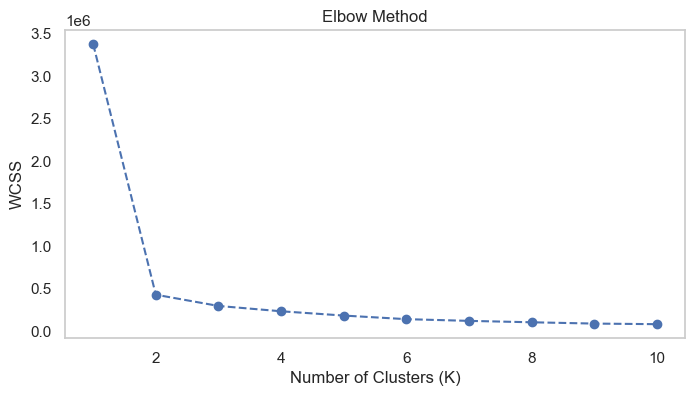

In [283]:
wcss = [] 
max_clusters = 10  
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [284]:
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

df1['cluster_LatLng'] = clusters

<Figure size 1000x600 with 0 Axes>

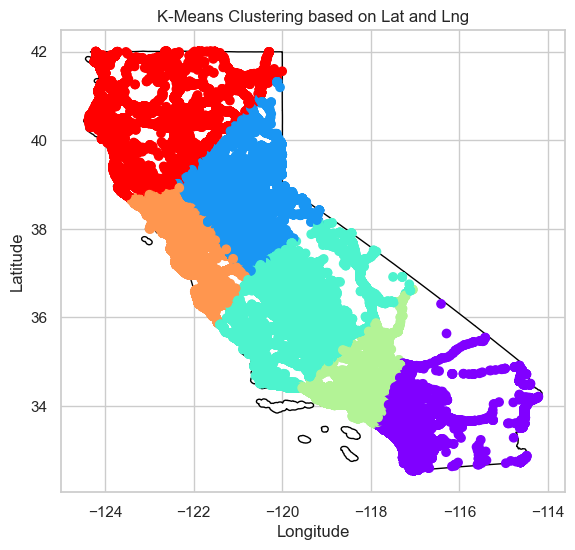

In [285]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

california_map = gpd.read_file('1.shp')
california_map.plot(ax = ax, color='white', edgecolor='black')
plt.scatter(df1['Start_Lng'],df1['Start_Lat'] , c=df1['cluster_LatLng'], cmap='rainbow')
plt.title('K-Means Clustering based on Lat and Lng')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 4. Fixing Skewness observed in the EDA

In [286]:
# Calculate the skewness for each numerical column
def display_skewed(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    print(df[numerical_cols].skew())
display_skewed(df1)

Severity            1.847
Start_Lat           0.509
Start_Lng          -0.388
Distance(mi)       12.407
Temperature(F)      0.291
Humidity(%)        -0.273
Pressure(in)       -3.848
Visibility(mi)      5.016
Wind_Speed(mph)    23.535
elapsed_time      297.656
day_of_week         0.117
hour_of_day        -0.229
month_of_year      -0.028
Year               -0.464
City_Freq_Enc       2.307
cluster_LatLng     -0.435
dtype: float64


Ignoring Categorical/Useless variables here: Severity, Start_Lat, Start_Lng, cluster_LatLng

In [287]:
def fix_skewness(df, column):
    # Apply log transformation for positive skewness
    if df[column].skew() > 0.5:
        df[column] = np.log1p(df[column])
    # Apply squaring for negative skewness
    elif df[column].skew() < -0.5:
        df[column] = np.square(df[column])

columns_to_fix = ['Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'elapsed_time']

for col in columns_to_fix:
    fix_skewness(df1, col)

display_skewed(df1)

Severity           1.847
Start_Lat          0.509
Start_Lng         -0.388
Distance(mi)       2.426
Temperature(F)     0.291
Humidity(%)       -0.273
Pressure(in)      -2.251
Visibility(mi)    -3.354
Wind_Speed(mph)   -0.898
elapsed_time       0.546
day_of_week        0.117
hour_of_day       -0.229
month_of_year     -0.028
Year              -0.464
City_Freq_Enc      2.307
cluster_LatLng    -0.435
dtype: float64


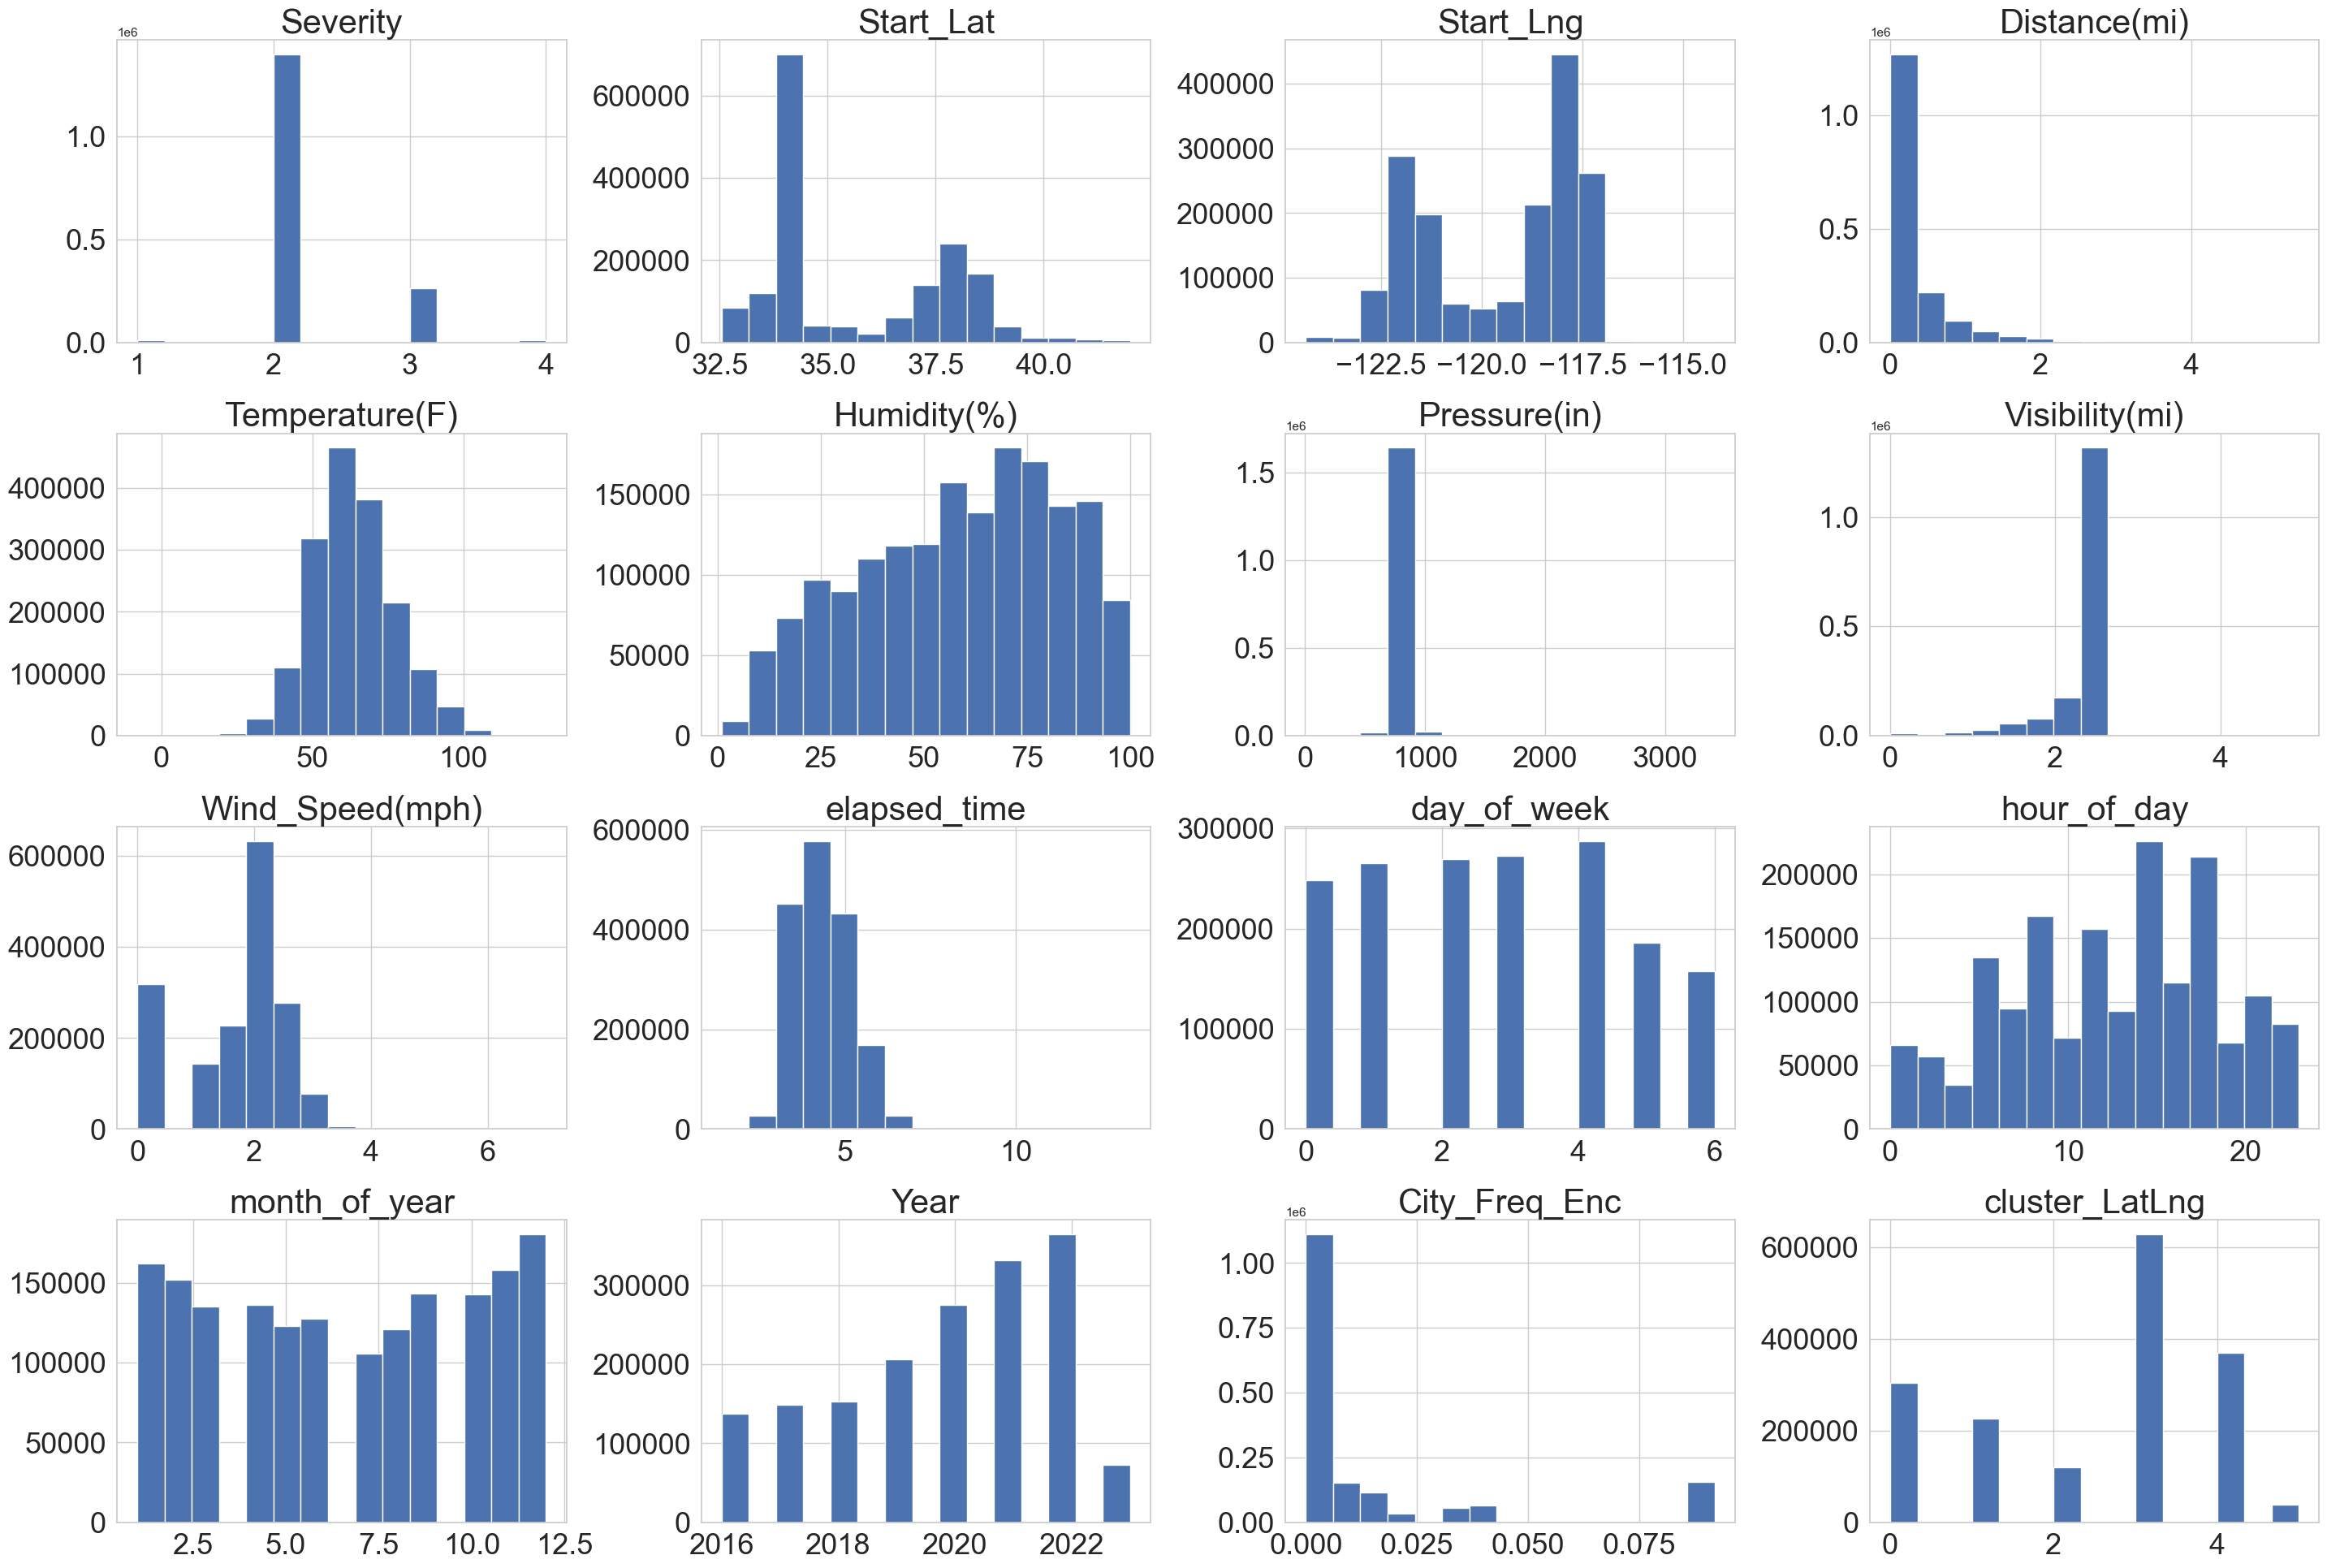

In [288]:
# Distribution
axes = df1.hist(bins=15, figsize=(35, 30), layout=(5, 4))

for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=30) 
    ax.set_xlabel(ax.get_xlabel(), fontsize=24) 
    ax.set_ylabel(ax.get_ylabel(), fontsize=28)  
    ax.tick_params(axis='both', which='major', labelsize=26) 

plt.show()

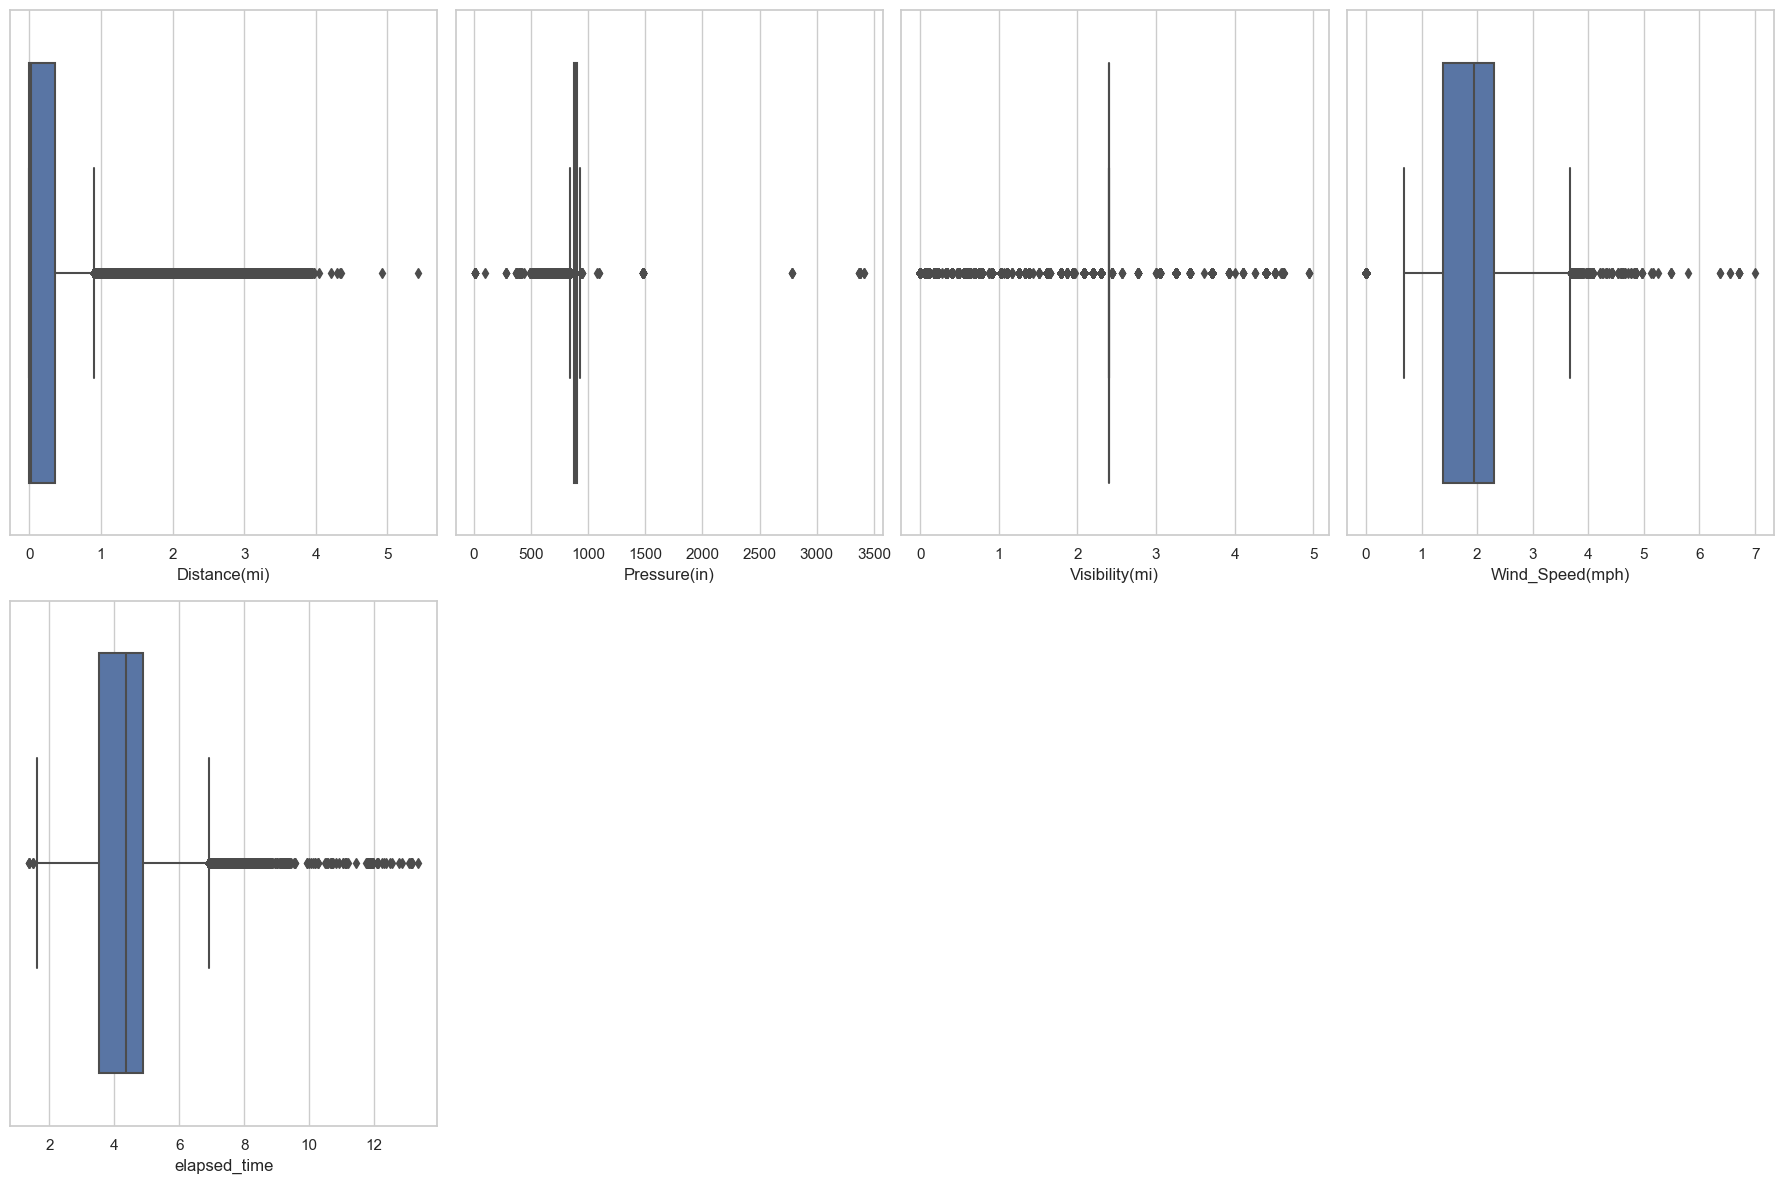

In [289]:
# Visualizing boxplots for Numerical Variables
plt.figure(figsize=(18, 12))
cols = ['Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'elapsed_time']

for i in range(len(cols)):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(x=df1[cols[i]])

plt.tight_layout()
plt.show()

- Outlier treatment still required.

# 5. Outlier Identification and Remidiation

In [290]:
# Capping and flooring outliers using Qtiles
for col in ['Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'elapsed_time']:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df1[col] = df1[col].clip(lower_bound, upper_bound)

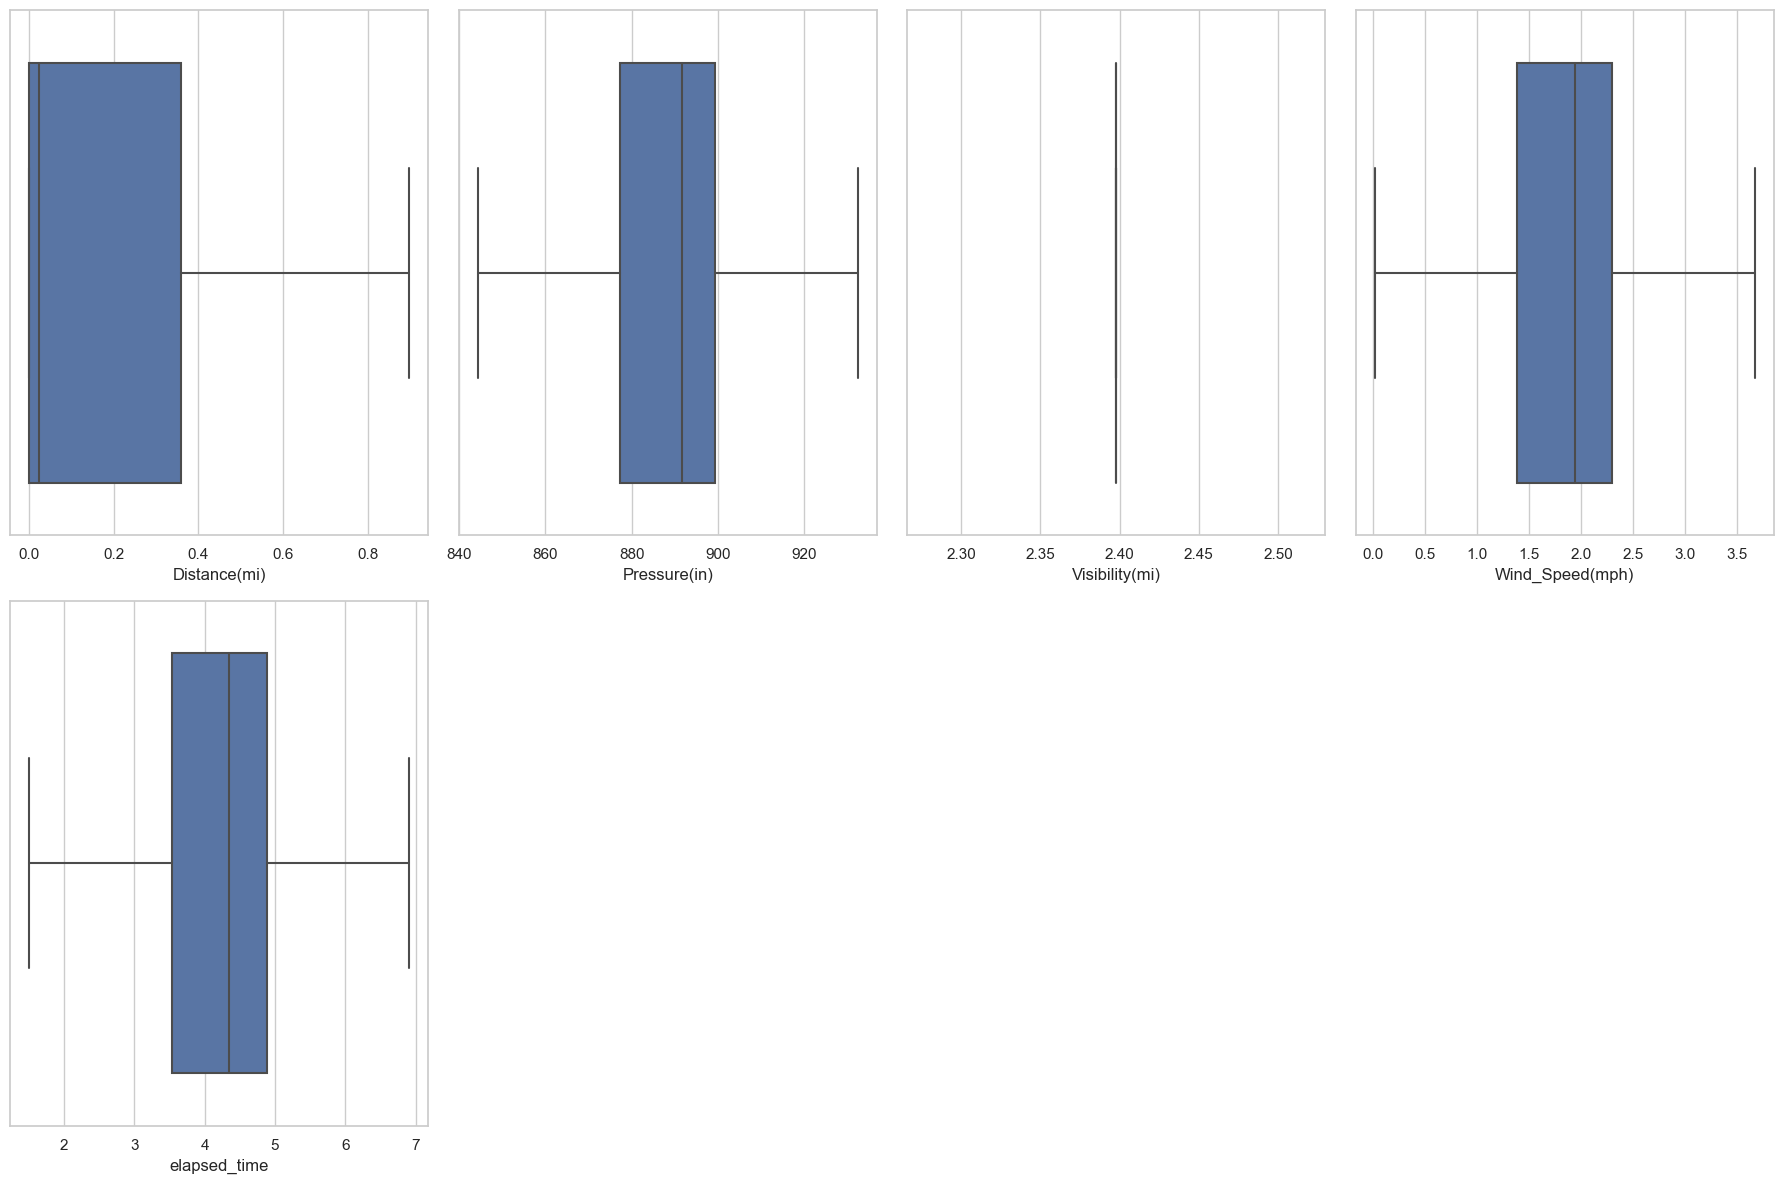

In [291]:
# Visualizing boxplots for Numerical Variables
plt.figure(figsize=(18, 12))
cols = ['Distance(mi)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'elapsed_time']

for i in range(len(cols)):
    plt.subplot(2, 4, i+1)  
    sns.boxplot(x=df1[cols[i]])

plt.tight_layout()
plt.show()

# 8. Encoding Categorical Variables

In [292]:
def display_categorical(df):
    object_columns = df.select_dtypes(include=['object','bool']).columns
    print(object_columns)
display_categorical(df1)

Index(['Source', 'County', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [293]:
categorical_cols = df1.select_dtypes(include=['object'])
categorical_cols.nunique()

Source                    3
County                   58
Wind_Direction           24
Weather_Condition         8
Sunrise_Sunset            2
Civil_Twilight            2
Nautical_Twilight         2
Astronomical_Twilight     2
dtype: int64

In [294]:
# Label Encoding for Variables with >3 Categories
categorical_cols = [ 'Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']

label_encoder = LabelEncoder()

for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [295]:
# One Hot Encoding for Variables with <=3 Categories
categorical_cols = ['Source', 'County', 'Wind_Direction', 'Weather_Condition']
df1 = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)
categorical_cols = df1.select_dtypes(include=['object','bool','category']).columns
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
    
df1.shape

(1686299, 121)

In [296]:
df1.shape

(1686299, 121)

In [297]:
df1.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,elapsed_time,day_of_week,hour_of_day,month_of_year,Year,City_Freq_Enc,cluster_LatLng,Source_Source2,Source_Source3,County_Alpine,County_Amador,County_Butte,County_Calaveras,County_Colusa,County_Contra Costa,County_Del Norte,County_El Dorado,County_Fresno,County_Glenn,County_Humboldt,County_Imperial,County_Inyo,County_Kern,County_Kings,County_Lake,County_Lassen,County_Los Angeles,County_Madera,County_Marin,County_Mariposa,County_Mendocino,County_Merced,County_Modoc,County_Mono,County_Monterey,County_Napa,County_Nevada,County_Orange,County_Placer,County_Plumas,County_Riverside,County_Sacramento,County_San Benito,County_San Bernardino,County_San Diego,County_San Francisco,County_San Joaquin,County_San Luis Obispo,County_San Mateo,County_Santa Barbara,County_Santa Clara,County_Santa Cruz,County_Shasta,County_Sierra,County_Siskiyou,County_Solano,County_Sonoma,County_Stanislaus,County_Sutter,County_Tehama,County_Trinity,County_Tulare,County_Tuolumne,County_Ventura,County_Yolo,County_Yuba,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Cloudy,Weather_Condition_Hail,Weather_Condition_Other,Weather_Condition_Rainy,Weather_Condition_Snowy,Weather_Condition_Volcanic Ash,Weather_Condition_Windy
0,3,38.085,-122.233,0.000,75.000,48.000,900.000,2.398,1.917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.434,1,10,6,2016,0.003,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,3,37.632,-122.084,0.000,75.000,48.000,903.604,2.398,1.723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.858,1,10,6,2016,0.007,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,37.897,-122.071,0.000,82.900,31.000,898.201,2.398,1.723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.434,1,10,6,2016,0.003,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,37.334,-122.032,0.000,75.900,48.000,902.402,2.398,1.723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.434,1,10,6,2016,0.001,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,37.251,-121.911,0.000,75.200,41.000,903.604,2.398,1.917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.888,1,10,6,2016,0.020,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# 11. Dimensionality Reduction

In [299]:
# Example using PCA for dimensionality reduction, if necessary
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.select_dtypes(include=[np.number]))